# Соколова Дарья, 3821Б1ПР1
## Системы компьютерной математики
### Вариант 17
#### Задача:
##### Метод Штрассена
Метод Штрассена умножения матриц заключается в разбиении матрицы на 4 равные клетки

$$\begin{pmatrix} C_{11} & C_{12} \\C_{21} & C_{22} \end{pmatrix} =
\begin{pmatrix} A_{11} & A_{12} \\A_{21} & A_{22}  \end{pmatrix} \cdot
\begin{pmatrix} B_{11} & B_{12}  \\B_{21} & B_{22}  \end{pmatrix}$$

и нахождения произведения по формулам:

\begin{array}{l}
D_1 = (A_{11} + A_{22}) \cdot (B_{11} + B_{22}) \\
D_2 = (A_{12} - A_{22}) \cdot (B_{21} + B_{22}) \\
D_3 = (A_{11} - A_{21}) \cdot (B_{11} + B_{12}) \\
D_4 = (A_{11} + A_{12}) \cdot B_{22} \\
D_5 = (A_{21} + A_{22}) \cdot B_{11} \\
D_6 = A_{11} \cdot (B_{12} - B_{22}) \\
D_7 = A_{22} \cdot (-B_{11}+B_{21}) \\\end{array}

                                                               и

\begin{array}{l}
    C_{11}  =    D_1   +   D_2             -   D_4                      +    D_7   ,\\
    C_{12}  =                                  D_4            +    D_6,             \\
    C_{21}  =                                            D_5            +    D_7   ,\\
    C_{22}  =    D_1             -   D_3             -   D_5  +    D_6.             \\
  \end{array}

Для нахождения произведений вида $(A_{11} + A_{22}) \cdot (B_{11} + B_{22})$  и т.п. рекурсивно используется тот же алгоритм.
Если обычный алгоритм умножения квадратных матриц порядка $n$ использует $O(n^3)$
 операций, то алгоритм Штрассена использует только $O(n^{\log_2 7}) = O(n^{2.8})$
. Напишите функцию strassen(A, B), реализующую этот алгоритм для матриц порядка $2^k$
. Экспериментально постройте графики зависимости времени работы алгоритма Штрассена и обычного алгоритма от порядка матрицы. Удастся ли вам дойти до таких размеров матриц, что ваша реализация алгоритма Штрассена будет быстрее обычного алгоритма умножения?


### Подключение необходимых библиотек

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import time
%matplotlib inline

### Обычный алгоритм умножения матриц 

На данный момент существует несколько реализаций алгоритма умножения матриц.

Самый простой подход к вычислению произведения двух матриц A и B размера n×n подразумевает использование формулы: 

$c_{ij} = \sum_{k=1}^n a_{ik} b_{kj} \qquad (i=1,2,\dots,n;~ j=1,2,\dots,n)$


In [14]:
def usual_algorithm(A, B):
    
    n = A.shape[0]
    C = np.zeros((n*n), dtype=np.float32).reshape(n,n)  
    if n == 1:
        C[0][0] = A[0][0] * B[0][0]
        
    else:
        for i in range(n):
            for k in range(n):
                for j in range(n):
                    C[i][j] += A[i][k] * B[k][j]
    return C

### Алгоритм Штрассена
Алгоритм Штрассена улучшает обычное матричное умножение с помощью подхода "разделяй и властвуй". Ключевым отличием является то, что умножение двух матриц 2 × 2 матрицы могут быть сделаны только с 7 умножениями, вместо обычных 8 за счет нескольких дополнительных операций сложения и вычитания. Это значит, что, обрабатывая входные  матрицы размера n×n как несколько  матриц 2×2, задачу умножения  матриц $n×n$ можно свести к 7 подзадачам умножения  матрицы размера $n/2×n/2$. 

Функция для алгоритма Штрассена:


In [15]:
def strassen(A, B):
    
    n = len(A)
    if n == 1:                 # случай, когда матрица состоит из единственного элемента
        C = A[0][0] * B[0][0]
    else:                      # иначе берём подматрицы из двух вышеупомянутых матриц A и B 
        C = np.zeros((n*n), dtype =int).reshape(n, n)    
        A11 = A[:n//2,:n//2]                              
        A21 = A[n//2:, :n//2]
        A12 = A[:n//2, n//2:]
        A22 = A[n//2:, n//2:]
        
        B11 = B[:n//2,:n//2]                             
        B21 = B[n//2:, :n//2]
        B12 = B[:n//2, n//2:]
        B22 = B[n//2:, n//2:]
        
        D1 = strassen(A11 + A22, B11 + B22)   
        D2 = strassen(A12 - A22, B21 + B22)
        D3 = strassen(A11 - A21, B11 + B12)
        D4 = strassen(A11 + A12, B22)
        D5 = strassen(A21 + A22, B11)
        D6 = strassen(A11, A12 - B22)
        D7 = strassen(A22, A21 - B11)        
        
        C[:n//2,:n//2] = D1 + D2 - D4 + D7
        C[:n//2, n//2:] = D4 + D6
        C[n//2:, :n//2] = D5 + D7
        C[n//2:, n//2:] = D1 - D3 - D5 + D6

    return C

Создадим две квадратные матрицы А и В и заполним их случайными целыми числами с помощью функции randint().

In [141]:
def create_matrix(n):
    
    A = np.random.randint(100, size=(n,n))
    B = np.random.randint(100, size=(n,n)) 
    
    return A, B

### Сравнение скорости алгоритмов
Напишем функцию graphics, которая строит график зависимости времени работы алгоритма Штрассена и обычного алгоритма от порядка матрицы. 

In [144]:
def graphics(n, strassen_time, usual_algorithm_time, k):
    
    plt.figure(figsize=(10, 10)) # размеры графика
    
    line1 = np.polyfit(n, strassen_time, 5)  # линии графика
    line2 = np.polyfit(n, usual_algorithm_time, 5)
    
    xx = np.linspace(0, 2**(n.shape[0]-1), 100)
    xxx = np.linspace(0, 2**(n.shape[0]-1), 100)
    yy = np.polyval(line1, xx)
    yyy = np.polyval(line2, xxx)
     
    plt.text(100, 4, "$O(n^3)$", fontsize=17)
    plt.text(100, 0.8, "$O(n^{\log_2 7})$", fontsize=17)
    
    plt.plot(xx, yy, color = 'tab:pink', linewidth = 3, label='Алгоритм Штрассена')
    plt.plot(xxx, yyy, color = 'tab:purple',linewidth = 3, label='Обычное умножение')
    plt.plot(n, strassen_time, 'o', color = 'tab:green') 
    plt.plot(n, usual_algorithm_time, '*',  color = 'tab:red')
    
    plt.xlabel('Порядок',fontsize = 15)
    plt.ylabel('Время', fontsize = 15)
    
    plt.grid()
    plt.legend(fontsize = 14)
    pass

In [145]:
n = np.arange(8)

strassen_time=np.zeros(8,dtype=float)    # Добавим переменные для времени выполнения каждого из алгоритмов.
usual_algorithm_time=np.zeros(8,dtype=float)

for i in range (8):
    k=2**i
    n[i]=k;
    
    A,B = create_matrix(k) # создание матриц А и В
    t0=time.time()   # t0 - время старта
    C=usual_algorithm(A,B)   # умножение по обычному методу  
    usual_algorithm_time[i] = time.time() - t0    # время выполнения стандартного алгоритма умножения матриц                   
    
    t0=time.time()  # t0 - время старта
    C=strassen(A,B) # умножение по методу Штрассена   
    strassen_time[i] = time.time()-t0   # время выполнения алгоритма Штрассена

Вызов функции отрисовки графика:


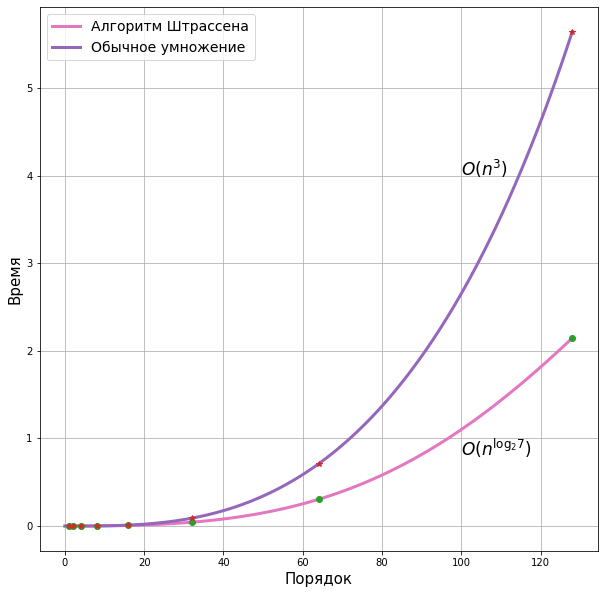

In [146]:
graphics(n, strassen_time, usual_algorithm_time, 1)

График показывает, что с  порядка матрицы $2^5$ начинается существенное расхождение: время работы обычного алгоритма стремительно растет, алгоритм Штрассена работает быстрее.

### Сравнение асимптотической сложности
Обычный алгоритм использует $O(n^3)$  операций.

Алгоритм Штрассена выполняет 7 матричных умножений $n/2*n/2$ и 18 операций сложения и вычитания матриц $n / 2 * n / 2$, поэтому сложность составляет: $T (n) = 7T (n / 2) + O (n ^ 2)  =>   {\displaystyle O(n^{\log _{2}7})\approx O(n^{2.807})}$

Найдем отношение времени выполнения алгоритма к его сложности для обычного перемножения и для алгоритма Штрассена и построим график роста времени работы программы. 

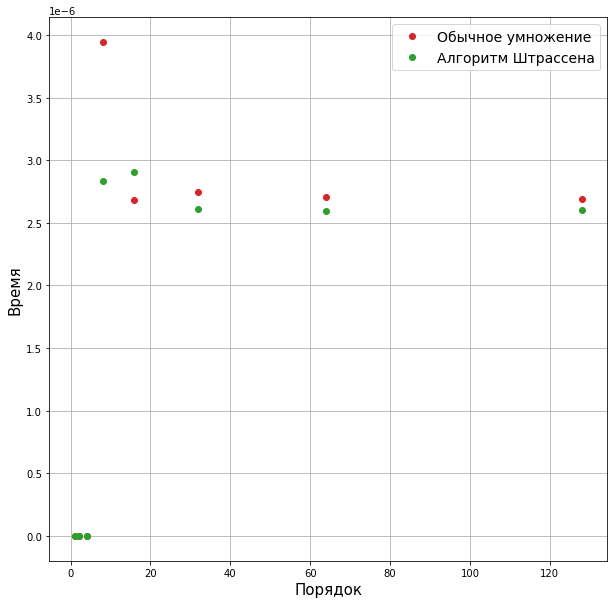

In [147]:
plt.figure(figsize=(10, 10))

# время выполнения стандартного алгоритма умножения матриц, деленное на его сложность:
O_Usual = usual_algorithm_time/(n**3)
plt.plot(n, O_Usual , 'o', label ='Обычное умножение',color = 'tab:red')

# время выполнения алгоритма Штрассена, деленное на его сложность: 
O_Strassen = strassen_time/(n**((math.log(7)/math.log(2))))
plt.plot(n, O_Strassen, 'o', label ='Алгоритм Штрассена',color = 'tab:green')

plt.legend(fontsize = 14)
plt.xlabel("Порядок", fontsize = 15)
plt.ylabel("Время", fontsize = 15)
pass
plt.grid()

Из графика следует, что асимптотически алгоритм Штрассена быстрее: время его работы растет не кубически, как у обыного способа, а по $n^{\log _{2}7}$. 

### Вывод:
В ходе выполнения работы я сравнила эффективность двух методов умножения матриц и доказала, что матрицы большего размера, чем $n^5 * n^5$, более эффективно умножаются с помощью алгоритма Штрассена, чем «традиционным» способом.
Метод Штрассена позволяет умножать матрицы  с меньшей сложностью, чем $O(n^3)$. Данный алгоритм быстрее стандартного и полезен на практике для больших матриц.